 FFT solution of Poisson's equation
 ----------------------------------


 Enter number points in x or y:  64


 CPU time = 0.015132 sec
 Potential in file PoissonFFT.data


E:\Anaconda\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


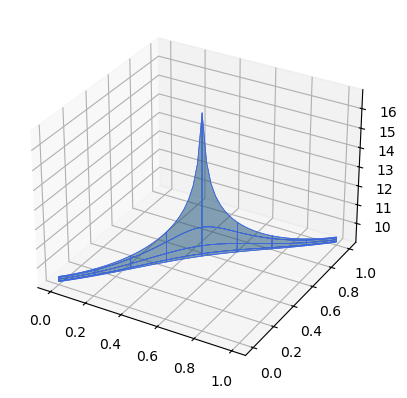

In [4]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt

print(" FFT solution of Poisson's equation")
print(" ----------------------------------")

N = int(input(" Enter number points in x or y: "))

n = 1
while n < N:
    n *= 2
if n != N:
    print(f" must be a power of 2, using {N:d}")
    N = n

h = 1 / (N - 1) # assume physical size in x and y = 1

t0 = time.perf_counter()

q = 10 # point charge
rho = np.zeros((N, N), dtype=np.complex128)
rho[N//2, N//2] = q / (h * h) # at center of lattice

f = np.zeros(N, dtype=np.complex128) # to store rows and columns

# FFT rows of rho
for j in range(N):
    for k in range(N):
        f[k] = rho[j, k]
    rho[j] = np.fft.fft(f)

# FFT columns of rho
for k in range(N):
    for j in range(N):
        f[j] = rho[j, k]
    rho[:, k] = np.fft.fft(f)

# Solve equation in Fourier space
i = 1j
pi = 4 * math.atan(1)
W = np.exp(2j * pi / N)
Wm, Wn = 1, 1
for m in range(N):
    for n in range(N):
        denom = 4 - Wm - 1/Wm - Wn - 1/Wn
        if denom != 0:
            rho[m, n] *= h**2 / denom
        Wn *= W
    Wm *= W

# Inverse FFT rows of rho
for j in range(N):
    for k in range(N):
        f[k] = rho[j, k]
    rho[j] = np.fft.ifft(f)

# Inverse FFT columns of rho
for k in range(N):
    for j in range(N):
        f[j] = rho[j, k]
    rho[:, k] = np.fft.ifft(f)

t1 = time.perf_counter()
print(f" CPU time = {t1 - t0:.6f} sec")

# Write potential to file
print(" Potential in file PoissonFFT.data")
xx = [0] * N 
yy = [0] * N 
with open("PoissonFFT.data", "w") as dataFile:
    for j in range(N):
        x = j * h
        xx[j] = x
        for k in range(N):
            y = k * h
            yy[k] = y
            dataFile.write(f"{x:.6f}\t{y:.6f}\t{rho[j, k].real:.6f}\n")
        dataFile.write("\n")

ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(xx,yy, rho, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)